## HW10
### 휴먼지능정보공학과 201910803 박채희

a) my_imresize function을 만드세요. 반드시 def my_imresize(img, scale) 형태로 만들어야 합니다. 여기서, img는 확대나 축소할 image 이름, scale은 확대 또는 축소비율 (scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from skimage import data

In [ ]:
def display_image_in_actual_size(im):

    dpi = mpl.rcParams['figure.dpi']
    #im_data = plt.imread(im_path)
    height, width= im.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im, cmap='gray')

    plt.show()

In [17]:
def my_imresize(img, scale):
   
    inv_scale = 1/scale
    (x,y) = img.shape
    (ix, iy)= (int(x*scale), int(y*scale))
    int_img=np.zeros((ix, iy), dtype="uint8")

    for i in np.arange(ix-1):
        row = i*inv_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j*inv_scale
            icol = int(col)
            b = col - icol
            int_img[i, j] = (img[irow,icol]*(1-a)*(1-b) + img[irow,icol+1]*a*(1-b) 
                               + img[irow+1,icol]*(1-a)*b +img[irow+1,icol+1]*a*b).astype("uint8")
    return int_img


b) a)에서 만든 function을 사용하여 실제 영상을 읽고, 확대하고 축소하고, 실제 크기로 display 하세요.

1) 원래 이미지

In [18]:
cam = data.camera()
img = cam.copy()
img.shape

(512, 512)

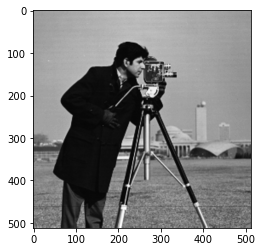

In [19]:
plt.imshow(img, cmap=plt.cm.gray)

2) 1.8배 크기 확대

(921, 921)


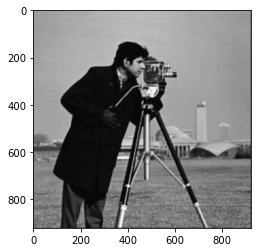

In [26]:
cam = data.camera()
img = cam.copy()
int_img=my_imresize(img,1.8)
print(int_img.shape)
plt.imshow(my_imresize(img,1.8),cmap=plt.cm.gray)

3) 50%로 크기 축소

(256, 256)


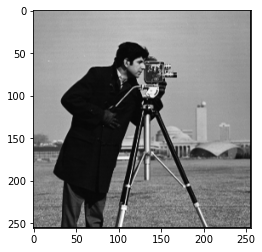

In [25]:
cam = data.camera()
img = cam.copy()
int_img=my_imresize(img,0.5)
print(int_img.shape)
plt.imshow(my_imresize(img,0.5),cmap=plt.cm.gray)